## 1. Problem Statement

#### 1. Gender analysis in the workplace provides valuable insights into understanding disparities between genders, particularly in terms of access to resources, opportunities, constraints, and power within the professional environment. 
#### 2. This project seeks to inform the development of policies, programs, and initiatives aimed at addressing gender disparities within the workplace. 
#### 3. The goal is to identify strategies that will enhance both employee productivity and overall business performance within the organization.


## 2. Import Libraries

In [460]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

## 3. Load Dataset

In [461]:
hr= pd.read_csv(r'C:\Users\12042\OneDrive\Documents\Dunni\Data Analysis\DA Projects\Python Projects\HR_Data.csv')

## 4. Overview of the Data

In [462]:
# A quick view of the first 5 rows and features
hr.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,51,No,Travel_Rarely,684,Research & Development,6,3,Life Sciences,1,162,...,3,80,0,23,5,3,20,18,15,15
1,52,No,Travel_Rarely,699,Research & Development,1,4,Life Sciences,1,259,...,1,80,1,34,5,3,33,18,11,9
2,42,No,Travel_Rarely,532,Research & Development,4,2,Technical Degree,1,319,...,4,80,0,22,3,3,22,17,11,15
3,47,No,Travel_Rarely,359,Research & Development,2,4,Medical,1,1443,...,2,80,2,26,2,4,20,17,5,6
4,46,No,Travel_Rarely,1319,Sales,3,3,Technical Degree,1,1863,...,4,80,1,25,5,3,19,17,2,8


In [463]:
# A quick view of the last 5 rows and features
hr.tail()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1465,25,No,Travel_Rarely,309,Human Resources,2,3,Human Resources,1,1987,...,3,80,0,6,3,3,2,0,1,2
1466,40,No,Travel_Rarely,543,Research & Development,1,4,Life Sciences,1,2012,...,3,80,2,8,3,2,1,0,0,0
1467,39,No,Non-Travel,105,Research & Development,9,3,Life Sciences,1,2022,...,3,80,0,21,3,2,6,0,1,3
1468,23,Yes,Travel_Frequently,638,Sales,9,3,Marketing,1,2023,...,1,80,1,1,3,2,1,0,1,0
1469,35,No,Travel_Rarely,1146,Human Resources,26,4,Life Sciences,1,2040,...,3,80,0,9,2,3,9,0,1,7


In [559]:
# Checking for the shape of the data
hr.shape
print("The number of rows is", hr.shape[0])
print ("The number of columns is", hr.shape[1])

The number of rows is 1470
The number of columns is 35


In [465]:
# Summary information about dataframe
hr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [466]:
# Summary information on the numeric columns
hr.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


## 5. Data Cleaning

In [467]:
# checking for data types for columns
hr.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

In [468]:
# Checking dataset for duplicated rows
hr.duplicated().sum()

0

In [469]:
# checking for missing values in the columns
hr.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [470]:
# Renaming column names

hr = hr.rename (columns ={'Education' : 'EducationLevel', 'TotalWorkingYears' : 'YearsOfExperience'})

In [471]:
# List of columns 

hr.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'EducationLevel', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'YearsOfExperience', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [472]:
# Dropping irrelevant columns and rows from the dataset
hr_new = hr.drop(['DistanceFromHome','EmployeeCount',.',EmployeeNumber','MonthlyRate', 
         'NumCompaniesWorked','Over18','RelationshipSatisfaction', 'StandardHours'], axis=1)

In [473]:
hr_new.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'EducationLevel', 'EducationField', 'EnvironmentSatisfaction', 'Gender',
       'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobRole',
       'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'StockOptionLevel',
       'YearsOfExperience', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [474]:
hr_new.shape

(1470, 27)

In [475]:
hr_new.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,EducationLevel,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,...,PercentSalaryHike,PerformanceRating,StockOptionLevel,YearsOfExperience,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,51,No,Travel_Rarely,684,Research & Development,3,Life Sciences,1,Male,51,...,13,3,0,23,5,3,20,18,15,15
1,52,No,Travel_Rarely,699,Research & Development,4,Life Sciences,3,Male,65,...,14,3,1,34,5,3,33,18,11,9
2,42,No,Travel_Rarely,532,Research & Development,2,Technical Degree,3,Male,58,...,11,3,0,22,3,3,22,17,11,15
3,47,No,Travel_Rarely,359,Research & Development,4,Medical,1,Female,82,...,19,3,2,26,2,4,20,17,5,6
4,46,No,Travel_Rarely,1319,Sales,3,Technical Degree,1,Female,45,...,12,3,1,25,5,3,19,17,2,8


In [476]:
# Counting the unique values in the "Education Level" column

hr_new['EducationLevel'].value_counts()

EducationLevel
3    572
4    398
2    282
1    170
5     48
Name: count, dtype: int64

In [477]:
# Replacing values in Education level column
hr_new['EducationLevel'].replace({1: 'Below College', 2: 'College', 3: 'Bachelor', 4:'Master', 5: 'Ph.D' },inplace =True )

In [478]:
hr_new['EducationLevel'].value_counts()

EducationLevel
Bachelor         572
Master           398
College          282
Below College    170
Ph.D              48
Name: count, dtype: int64

In [479]:
# Counting the unique values in the "Job Satisfaction" column

hr_new['JobSatisfaction'].value_counts()

JobSatisfaction
4    459
3    442
1    289
2    280
Name: count, dtype: int64

In [480]:
# Replacing values in Job Satisfaction column
hr_new['JobSatisfaction'].replace({1: 'Low', 2: 'Partial', 3: 'High', 4:'Very High'}, inplace =True)

In [481]:
 hr_new['JobInvolvement'].value_counts()

JobInvolvement
3    868
2    375
4    144
1     83
Name: count, dtype: int64

In [482]:
# Replacing values in Job Involvement column
hr_new['JobInvolvement'].replace({1: 'Low', 2: 'Partial', 3: 'High', 4:'Very High'}, inplace =True)

In [483]:
 hr_new['JobInvolvement'].value_counts()

JobInvolvement
High         868
Partial      375
Very High    144
Low           83
Name: count, dtype: int64

In [484]:
# Replacing values in Job Satisfaction column
hr_new['PerformanceRating'].replace({1: 'Low', 2: 'Good', 3: 'Very Good', 4:'Outstanding'}, inplace =True)

In [485]:
hr_new['PerformanceRating'].value_counts()

PerformanceRating
Very Good      1244
Outstanding     226
Name: count, dtype: int64

In [486]:
# Replacing values in Job Satisfaction column
hr_new['WorkLifeBalance'].replace({1: 'Bad', 2: 'Good', 3: 'Better', 4:'Best'}, inplace =True)

In [487]:
hr_new['WorkLifeBalance'].value_counts()

WorkLifeBalance
Better    893
Good      344
Best      153
Bad        80
Name: count, dtype: int64

In [488]:
# Replacing values in Job Involvement column
hr_new['EnvironmentSatisfaction'].replace({1: 'Low', 2: 'Partial', 3: 'High', 4:'Very High'}, inplace =True)

In [489]:
hr_new['EnvironmentSatisfaction'].value_counts()

EnvironmentSatisfaction
High         453
Very High    446
Partial      287
Low          284
Name: count, dtype: int64

In [490]:
hr_new.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,EducationLevel,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,...,PercentSalaryHike,PerformanceRating,StockOptionLevel,YearsOfExperience,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,51,No,Travel_Rarely,684,Research & Development,Bachelor,Life Sciences,Low,Male,51,...,13,Very Good,0,23,5,Better,20,18,15,15
1,52,No,Travel_Rarely,699,Research & Development,Master,Life Sciences,High,Male,65,...,14,Very Good,1,34,5,Better,33,18,11,9
2,42,No,Travel_Rarely,532,Research & Development,College,Technical Degree,High,Male,58,...,11,Very Good,0,22,3,Better,22,17,11,15
3,47,No,Travel_Rarely,359,Research & Development,Master,Medical,Low,Female,82,...,19,Very Good,2,26,2,Best,20,17,5,6
4,46,No,Travel_Rarely,1319,Sales,Bachelor,Technical Degree,Low,Female,45,...,12,Very Good,1,25,5,Better,19,17,2,8


In [491]:
# Organizing Job level column values into group (Binning)

def job_level(value):
    if 1<= value <=2.99:
        return 'Junior'
    elif 3<= value <= 3.99:
        return 'Intermediate'
    else:
        return 'Senior'

hr_new['PositionLevel']=hr_new['JobLevel'].apply(job_level)
hr_new.head()


,Age,Attrition,BusinessTravel,DailyRate,Department,EducationLevel,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,...,PerformanceRating,StockOptionLevel,YearsOfExperience,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,PositionLevel
0,51,No,Travel_Rarely,684,Research & Development,Bachelor,Life Sciences,Low,Male,51,...,Very Good,0,23,5,Better,20,18,15,15,Senior
1,52,No,Travel_Rarely,699,Research & Development,Master,Life Sciences,High,Male,65,...,Very Good,1,34,5,Better,33,18,11,9,Senior
2,42,No,Travel_Rarely,532,Research & Development,College,Technical Degree,High,Male,58,...,Very Good,0,22,3,Better,22,17,11,15,Senior
3,47,No,Travel_Rarely,359,Research & Development,Master,Medical,Low,Female,82,...,Very Good,2,26,2,Best,20,17,5,6,Senior
4,46,No,Travel_Rarely,1319,Sales,Bachelor,Technical Degree,Low,Female,45,...,Very Good,1,25,5,Better,19,17,2,8,Senior


In [492]:
hr_new['PositionLevel'].unique()


array(['Senior', 'Intermediate', 'Junior'], dtype=object)

## 6 Exploratory Data Analysis (EDA)

### 6.1. Gender Representation in the Company

In [493]:
# Checking for Gender types in the Gender column.
gender_type= hr_new['Gender'].unique()
print(gender_type)

['Male' 'Female']


In [494]:
# Determining the number of people in each gender group in the Gender column.
gender_dist= hr_new['Gender'].value_counts().reset_index()
print(gender_dist)

   Gender  count
0    Male    882
1  Female    588


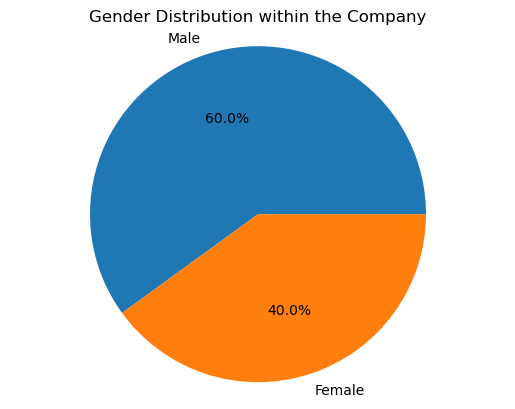

In [495]:
# Plotting a Pie Chart to depict the distribution of Gender in the company.

plt.pie(gender_dist['count'], labels = gender_dist['Gender'],autopct ='%1.1f%%')
plt.title('Gender Distribution within the Company')
plt.axis('equal')
plt.show()

#### The chart depicts the gender distribution of employees in the organization, with 60% male and 40% female. This results in a ratio of 3:2, indicating that for every 3 male employees, there are only 2 female employees.

In [496]:
hr_new['Attrition'].value_counts()

Attrition
No     1233
Yes     237
Name: count, dtype: int64

#### The company has 1,233 active staff members and a turnover of 237 employees, resulting in a turnover ratio of approximately 16.1%.

In [497]:
# Investigating attrition among Female Employees

len(hr_new[(hr_new.Attrition=='Yes') & (hr_new.Gender=='Female')])



87

#### Out of the 237 employees who have departed the company, 87 were female. This means that approximately 36.7% of the total number of employees who have left are female.


In [498]:
# Female employees currently with the company. 
len(hr_new[(hr_new.Attrition=='No') & (hr_new.Gender=='Female')])

501

#### The company has 501 female employees, and 87 of them have left, resulting in an attrition rate of approximately 15%.

In [499]:
# Investigating attrition among male Employees

len(hr_new[(hr_new.Attrition=='Yes') & (hr_new.Gender=='Male')])



150

#### Out of the 237 employees who have left the company, a 150 were male.  This means approximately 63.3% of employees who have left the company were male, out of a total of 237 departures.

In [500]:
# Male employees currently with the company. 
len(hr_new[(hr_new.Attrition=='No') & (hr_new.Gender=='Male')])

732

#### The company has 732 male employees, with 150 of them leaving, resulting in an attrition ratio of approximately 17%.

In [501]:
from pandas._libs.tslibs.period import DIFFERENT_FREQ
hr_male = hr_new[hr_new['Gender'] == 'Male']
hr_female = hr_new[hr_new['Gender'] == 'Female']

In [502]:
mean_age_male = hr_male['Age'].mean()
mean_age_female = hr_female['Age'].mean()

print("Average age for male employees is ",mean_age_male)
print("Average age for female employees is ", mean_age_female)

Average age for male employees is  36.6530612244898
Average age for female employees is  37.32993197278912


In [503]:
age = hr_new['Age'].mean()
print('Age average of employees is', age)


Age average of employees is 36.923809523809524


<Axes: xlabel='Attrition', ylabel='Age'>

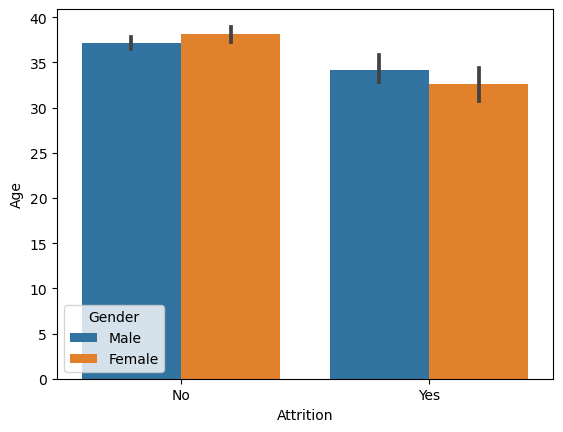

In [504]:
# Visualizing the relationship between Attrition, Age and Gender.
sns.barplot(x='Attrition', y='Age', data=hr_new, hue = 'Gender', estimator= 'mean')

#### The bar plot compares the average age of employees who have stayed with the company to those who have left, grouped by gender. It indicates that the average age of employees who have left is slightly younger than those currently employed, but the age difference is not significant.

### 6.2. Gender Disparities in Access to Resources and Opportunities within the Company

In [505]:
# Deleting rows where Attrition is "Yes" 
for x in hr_new.index:
    if hr_new.loc[x, 'Attrition']=='Yes':
        hr_new.drop(x, inplace = True)

In [506]:
hr_new['Attrition'].unique()

array(['No'], dtype=object)

In [507]:
hr_new.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'EducationLevel', 'EducationField', 'EnvironmentSatisfaction', 'Gender',
       'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobRole',
       'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'StockOptionLevel',
       'YearsOfExperience', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'PositionLevel'],
      dtype='object')

In [508]:
# Investigating Gender disparities in average hourly rates.
hr_new.groupby('Gender')['DailyRate'].mean()

Gender
Female    821.608782
Male      806.273224
Name: DailyRate, dtype: float64

<Axes: xlabel='Gender', ylabel='DailyRate'>

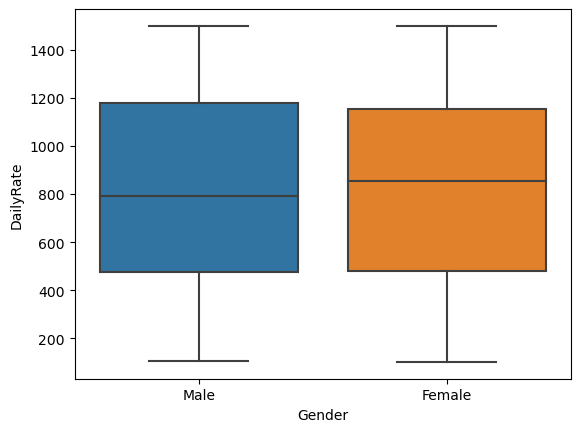

In [509]:
sns.boxplot(x='Gender', y='DailyRate', data = hr_new)

#### The analysis of the daily rates by gender showed a small disparity in pay between female and male employees. In particular, the average daily rate for female employees is 821.61 dollars, while it is 806.27 dollars for male employees. This suggests that, on average, female employees earn 15.34 dollars more per day than their male counterparts.

In [510]:
hr_new.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,EducationLevel,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,...,PerformanceRating,StockOptionLevel,YearsOfExperience,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,PositionLevel
0,51,No,Travel_Rarely,684,Research & Development,Bachelor,Life Sciences,Low,Male,51,...,Very Good,0,23,5,Better,20,18,15,15,Senior
1,52,No,Travel_Rarely,699,Research & Development,Master,Life Sciences,High,Male,65,...,Very Good,1,34,5,Better,33,18,11,9,Senior
2,42,No,Travel_Rarely,532,Research & Development,College,Technical Degree,High,Male,58,...,Very Good,0,22,3,Better,22,17,11,15,Senior
3,47,No,Travel_Rarely,359,Research & Development,Master,Medical,Low,Female,82,...,Very Good,2,26,2,Best,20,17,5,6,Senior
4,46,No,Travel_Rarely,1319,Sales,Bachelor,Technical Degree,Low,Female,45,...,Very Good,1,25,5,Better,19,17,2,8,Senior


In [511]:
# Creating a Pivot Table
pivot_table = pd.pivot_table(hr_new, index = 'Gender', columns = 'Department',
                             values=['DailyRate', 'MonthlyIncome'], aggfunc = 'mean',  margins=True)

pivot_table

DailyRate                                                 \
Department Human Resources Research & Development       Sales         All   
Gender                                                                      
Female          887.428571             796.928571  870.423841  821.608782   
Male            700.648649             827.766260  773.433498  806.273224   
All             751.921569             815.252415  814.805085  812.504461   

             MonthlyIncome                                                   
Department Human Resources Research & Development        Sales          All  
Gender                                                                       
Female         8761.142857            6808.166667  7328.039735  7019.429142  
Male           6810.513514            6508.873984  7160.980296  6704.964481  
All            7345.980392            6630.326087  7232.240113  6832.739659

#### The analysis reveals the average daily rates and monthly incomes categorized by department and gender. Key findings indicate that female employees typically earn higher daily rates and monthly incomes than male employees, particularly in the Human Resources and Sales departments.





In [512]:
# Creating a Pivot Table
pivot_table = pd.pivot_table(hr_new, index = 'Gender', columns = 'EducationLevel',
                             values=['DailyRate', 'MonthlyIncome'], aggfunc = 'mean',  margins=True)

pivot_table

DailyRate                                                    \
EducationLevel    Bachelor Below College     College      Master        Ph.D   
Gender                                                                         
Female          828.822335    825.571429  814.897959  822.413043  765.368421   
Male            768.880435    817.788889  848.900000  824.955446  787.208333   
All             793.845666    820.532374  834.899160  823.923529  777.558140   

                           MonthlyIncome                             \
EducationLevel         All      Bachelor Below College      College   
Gender                                                                
Female          821.608782   7174.238579   5892.959184  6604.908163   
Male            806.273224   6674.985507   5944.188889  6572.864286   
All             812.504461   6882.919662   5926.129496  6586.058824   

                                                       
EducationLevel       Master         Ph.D          All  
Gender                                                 
Female          7132.123188  9638.947368  7019.429142  
Male            7057.544554  7705.666667  6704.964481  
All             7087.814706  8559.906977  6832.739659

#### Women across all educational levels tend to have slightly higher average daily rates and monthly incomes compared to men, with women with a Ph.D. showing significantly higher incomes than their male counterparts. This suggests that gender disparities in compensation persist within organizations at various education levels, indicating a need for further investigation into the factors influencing these differences.

In [513]:
# Creating a Pivot Table
pivot_table = pd.pivot_table(hr_new, index = 'Gender', columns = 'EducationField',
                             values=['DailyRate', 'MonthlyIncome'], aggfunc = 'mean',  margins=True)

pivot_table

DailyRate                                        \
EducationField Human Resources Life Sciences   Marketing     Medical   
Gender                                                                 
Female                  631.80    814.049505  795.592593  846.415205   
Male                    692.80    821.828571  681.285714  821.286957   
All                     677.55    818.789168  731.064516  832.002494   

                                                          MonthlyIncome  \
EducationField       Other Technical Degree         All Human Resources   
Gender                                                                    
Female          755.629630       855.428571  821.608782        12309.40   
Male            815.363636       835.551724  806.273224         7336.80   
All             792.647887       843.900000  812.504461         8579.95   

                                                                     \
EducationField Life Sciences    Marketing      Medical        Other   
Gender                                                                
Female           6928.331683  7702.888889  6756.783626  6187.888889   
Male             6677.390476  7467.085714  6833.534783  6566.795455   
All              6775.437137  7569.774194  6800.805486  6422.704225   

                                              
EducationField Technical Degree          All  
Gender                                        
Female              7552.976190  7019.429142  
Male                5366.482759  6704.964481  
All                 6284.810000  6832.739659


#### The findings above indicate that there are gender disparities in compensation exist across various education fields within the company, with women in areas like Medical and Technical Degree receiving higher salaries than men.

In [514]:
# Investigating gender disparities in opportunities for business traveling 
hr_new['BusinessTravel'].unique()

array(['Travel_Rarely', 'Travel_Frequently', 'Non-Travel'], dtype=object)

In [515]:
business_travel = hr_new.groupby(['BusinessTravel', 'Gender']).size().reset_index()

In [516]:
business_travel= business_travel.rename(columns={0: 'Count'})

In [517]:
business_travel

,BusinessTravel,Gender,Count
0,Non-Travel,Female,46
1,Non-Travel,Male,92
2,Travel_Frequently,Female,87
3,Travel_Frequently,Male,121
4,Travel_Rarely,Female,368
5,Travel_Rarely,Male,519


<Axes: xlabel='BusinessTravel', ylabel='count'>

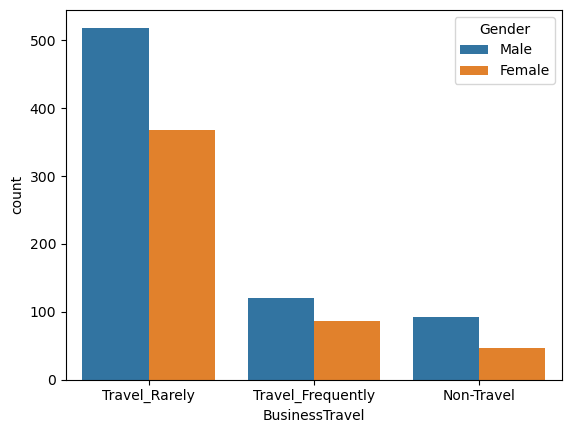

In [518]:
sns.countplot (x= 'BusinessTravel', data = hr_new, hue= 'Gender')

#### Overall, males are more prevalent in every travel category, especially in the "Travel Rarely" segment, which also has the largest number of employees. This distribution indicates potential gender discrepancies in business travel frequencies within the company.







<Axes: xlabel='BusinessTravel', ylabel='JobLevel'>

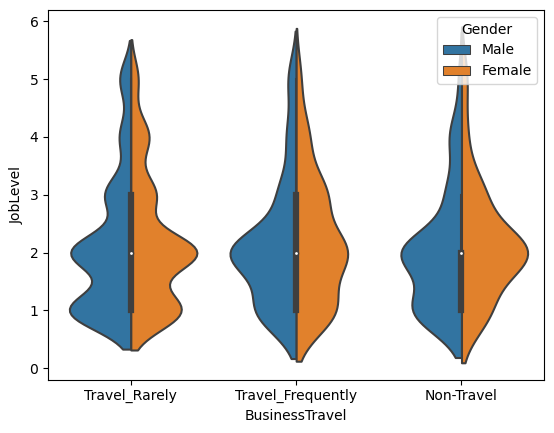

In [519]:
sns.violinplot (x= 'BusinessTravel', y= 'JobLevel', data = hr_new, hue= 'Gender', split = True)


#### The chart reveals that job levels 1 and 2 are the most prevalent in all categories of business travel for both males and females. The distribution patterns are fairly similar for both genders, with minor differences in density at various job levels. This indicates a consistent gender representation across different job levels, regardless of their frequency of business travel.







### 6.3 Gender Disparities in Performance and Overall Satisfaction


In [520]:
hr_new.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,EducationLevel,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,...,PerformanceRating,StockOptionLevel,YearsOfExperience,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,PositionLevel
0,51,No,Travel_Rarely,684,Research & Development,Bachelor,Life Sciences,Low,Male,51,...,Very Good,0,23,5,Better,20,18,15,15,Senior
1,52,No,Travel_Rarely,699,Research & Development,Master,Life Sciences,High,Male,65,...,Very Good,1,34,5,Better,33,18,11,9,Senior
2,42,No,Travel_Rarely,532,Research & Development,College,Technical Degree,High,Male,58,...,Very Good,0,22,3,Better,22,17,11,15,Senior
3,47,No,Travel_Rarely,359,Research & Development,Master,Medical,Low,Female,82,...,Very Good,2,26,2,Best,20,17,5,6,Senior
4,46,No,Travel_Rarely,1319,Sales,Bachelor,Technical Degree,Low,Female,45,...,Very Good,1,25,5,Better,19,17,2,8,Senior


In [521]:
# Investigating gender differences in job satisfaction 
hr_new['JobSatisfaction'].unique()

array(['High', 'Very High', 'Low', 'Partial'], dtype=object)

<Axes: xlabel='JobSatisfaction', ylabel='count'>

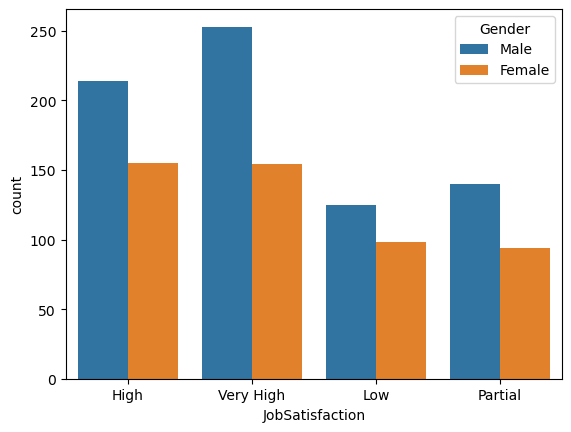

In [524]:
# Visualizing the relationship between Job Satisfaction and Gender.
sns.countplot(x='JobSatisfaction',data=hr_new, hue = 'Gender')

#### The graph illustrates that male workers consistently tend to express greater levels of job satisfaction compared to their female counterparts. This trend is most evident in the 'Very High' satisfaction category. However, in the 'Low' and 'Partial' satisfaction categories, the numbers are fairly similar between both genders, with males slightly outnumbering females.

In [525]:
# Investigating gender differences in Environment satisfaction 
hr_new['EnvironmentSatisfaction'].unique()

array(['Low', 'High', 'Very High', 'Partial'], dtype=object)

<Axes: xlabel='EnvironmentSatisfaction', ylabel='count'>

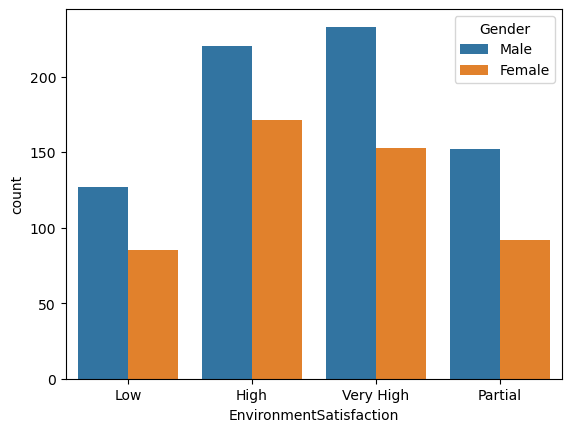

In [526]:
# Visualizing the relationship between Environment and Gender.
sns.countplot(x='EnvironmentSatisfaction',data=hr_new, hue = 'Gender')

#### This bar plot shows the count of individuals by environment satisfaction levels ("Low," "High," "Very High," and "Partial"), categorized by gender. Blue bars represent males, and orange bars represent females. For each satisfaction level, males outnumber females, with the largest difference observed in the "Very High" satisfaction level.








In [529]:
# Investigating gender differences in Environment satisfaction 
hr_new['JobInvolvement'].unique()

array(['High', 'Partial', 'Very High', 'Low'], dtype=object)

<Axes: xlabel='JobInvolvement', ylabel='count'>

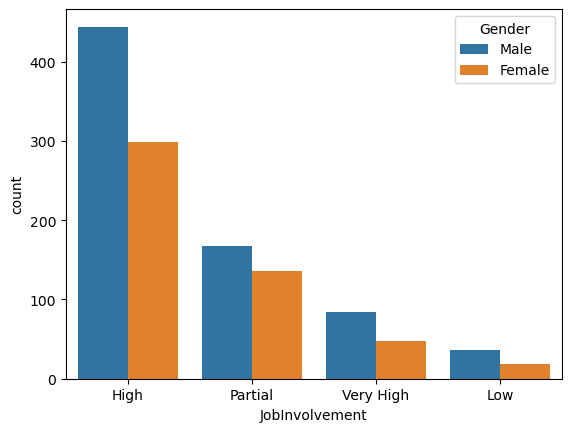

In [531]:
# Visualizing the relationship between Job Involvement and Gender.
sns.countplot(x='JobInvolvement',data=hr_new, hue = 'Gender')

#### The data from the graph reveals that male workers Male workers demonstrate higher levels of job involvement compared to female workers, particularly in the 'High' category. However, in the 'Partial' and 'Very High' categories, gender differences are less pronounced. Both genders show minimal involvement in the 'Low' category.

In [532]:
# Investigating gender differences in Marital Staus 
hr_new['MaritalStatus'].unique()

array(['Single', 'Married', 'Divorced'], dtype=object)

<Axes: xlabel='MaritalStatus', ylabel='count'>

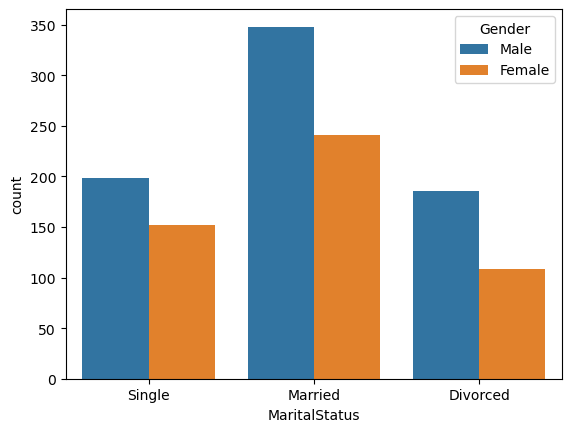

In [533]:
# Visualizing the relationship between Job Involvement and Gender.
sns.countplot(x='MaritalStatus',data=hr_new, hue = 'Gender')

#### The count plot visually illustrates the distribution of marital status among genders in our dataset. In general, males have a higher representation in each marital status category, especially in the "Married" category, which also has the largest number of employees.

In [535]:
# Investigating gender differences in how they handle Work Life Balance 
hr_new['WorkLifeBalance'].unique()

array(['Better', 'Best', 'Good', 'Bad'], dtype=object)

<Axes: xlabel='WorkLifeBalance', ylabel='count'>

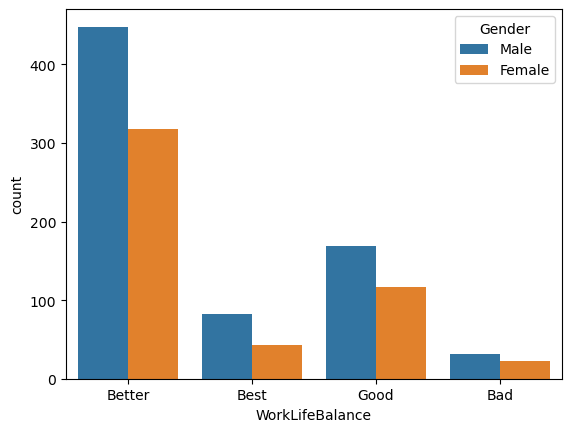

In [536]:
# Visualizing the relationship between Job Involvement and Gender.
sns.countplot(x='WorkLifeBalance',data=hr_new, hue = 'Gender')

#### The graph shows that most males report a "Better" work-life balance, followed by "Best," "Good," and only a few report "Bad." Females also report the highest count in the "Better" category, with fewer responses in "Good" and the least in "Bad". The number of males reporting a "Better" work-life balance is significantly higher than that of females.


In [537]:
# Investigating gender differences in how they perform at work 
hr_new['PerformanceRating'].unique()

array(['Very Good', 'Outstanding'], dtype=object)

<Axes: xlabel='PerformanceRating', ylabel='count'>

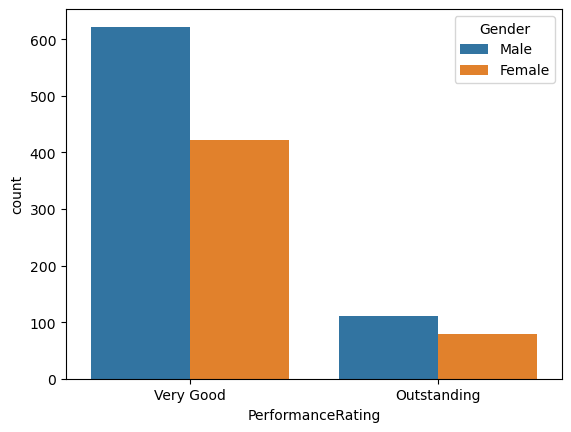

In [538]:
# Visualizing the relationship between Performance Rating and Gender.
sns.countplot(x='PerformanceRating',data=hr_new, hue = 'Gender')

#### The chart illustrates employee performance ratings, specifically "Very Good" and "Outstanding," categorized by gender. It is evident from the data that both men and women receive "Very Good" ratings more frequently than "Outstanding." Nevertheless, a significantly greater number of men are represented in both performance categories compared to women. The distribution indicates that while a large proportion of employees attain a "Very Good" rating, only a few reach the level of "Outstanding." 

In [540]:
# Investigating gender differences in how they perform at work 
hr_new['PercentSalaryHike'].unique()

array([13, 14, 11, 19, 12, 25, 16, 17, 22, 23, 20, 21, 15, 24, 18],
      dtype=int64)

<Axes: xlabel='EducationField', ylabel='PercentSalaryHike'>

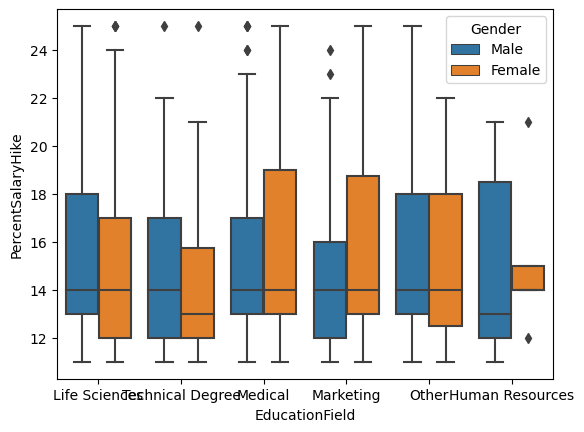

In [550]:
sns.boxplot(x='EducationField', y = 'PercentSalaryHike', data=hr_new, hue='Gender')

#### This box plot displays the distribution of percent salary hikes across different education fields, categorized by gender. The education fields include Life Sciences, Technical Degree, Medical, Marketing, Other, and Human Resources.  In general, the distributions of salary hikes vary by education field, with some fields showing higher median salary hikes for males and others for females.

### 6.4 Gender Disparities in Accessibility to Power

In [528]:
hr_new.columns


Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'EducationLevel', 'EducationField', 'EnvironmentSatisfaction', 'Gender',
       'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobRole',
       'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'StockOptionLevel',
       'YearsOfExperience', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'PositionLevel'],
      dtype='object')

In [547]:
# Investigating gender differences in Stock option level 
hr_new['StockOptionLevel'].unique()

array([0, 1, 2, 3], dtype=int64)

<Axes: xlabel='Department', ylabel='StockOptionLevel'>

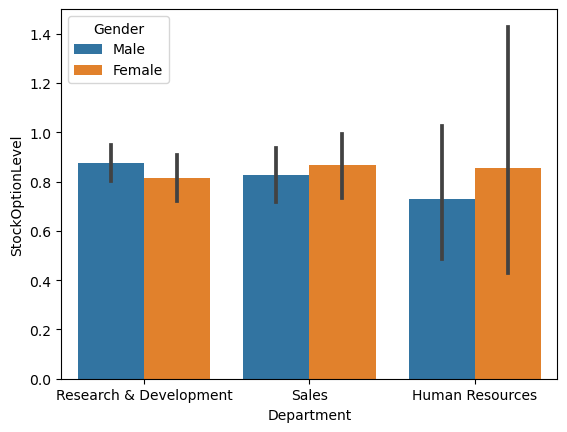

In [560]:
sns.barplot(x='Department', y = 'StockOptionLevel', data=hr_new, hue='Gender')

#### The distribution of stock options across departments is relatively balanced between genders, although there are some variations indicating a range of distribution within the departments.

In [551]:
# Investigating gender differences in Job level 
hr_new['JobLevel'].unique()

array([5, 4, 3, 2, 1], dtype=int64)

<Axes: xlabel='Department', ylabel='JobLevel'>

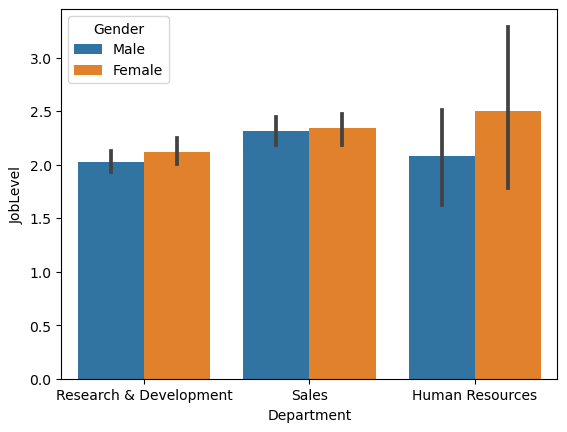

In [554]:
sns.barplot(x='Department', y = 'JobLevel', data=hr_new, hue='Gender')

#### This bar plot displays the average job levels across different departments, categorized by gender. The departments are Research & Development, Sales, and Human Resources. Blue bars represent males, and orange bars represent females. Overall, the average job levels are relatively consistent across genders in the Research & Development and Sales departments, with a notable higher job level for females in Human Resources.

In [556]:
# Investigating gender differences in Job Role 
hr_new['JobRole'].unique()

array(['Research Director', 'Manager', 'Sales Executive',
       'Manufacturing Director', 'Research Scientist',
       'Healthcare Representative', 'Laboratory Technician',
       'Sales Representative', 'Human Resources'], dtype=object)

<Axes: xlabel='Department', ylabel='JobLevel'>

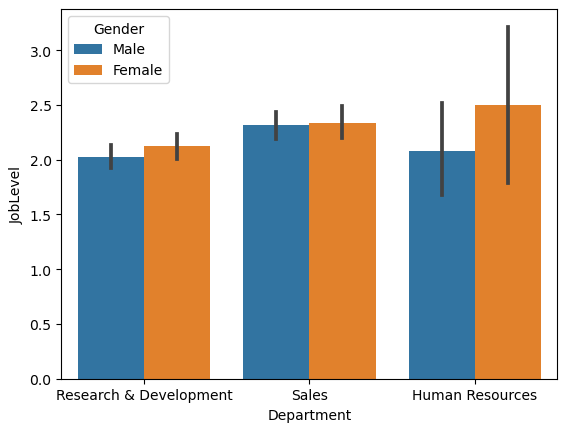

In [558]:
sns.barplot(x='Department', y = 'JobLevel', data=hr_new, hue='Gender')

#### The data suggest that while job levels in the Sales department are relatively balanced between genders, however, discrepancies exist in Research & Development and Human Resources departments. 

## 7.1 Recommendations

#### 1. Perform regular audits to assess gender representation, job level distribution, and pay equity across all departments.
#### 2. Develop programs that support the career advancement of the underrepresented genders in departments with notable disparities.
#### 3. Develop a process that will help mitigate unconscious bias in the promotion process. Also, the criteria for promotion should be equally accessible to all. 
#### 4. Provide equal access to professional development opportunities and encourage participation across all departments especially in departments where gender disparities are evident.
#### 5. Promote a culture of inclusion and diversity through training and create a support network for underrepresented groups.
#### 6. Review  their recruitment practices and implement strategies that will help them attract a diverse pool of candidates.
#### 7. Set measurable goals that are transparent for reducing gender disparities and regularly report on progress to all stakeholders.